# Submitted by Gomathy Sankar K
## Task 2
### Predicting the optimum number of clusters for the Iris Dataset

#### Loading in the Libraries

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

#### Iris Dataset 

In [2]:
iris = pd.read_csv('E:\Data Science in Python\GRIP Tasks\Iris.csv')
iris = iris.set_index('Id')
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [3]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Exploratory Data Analysis

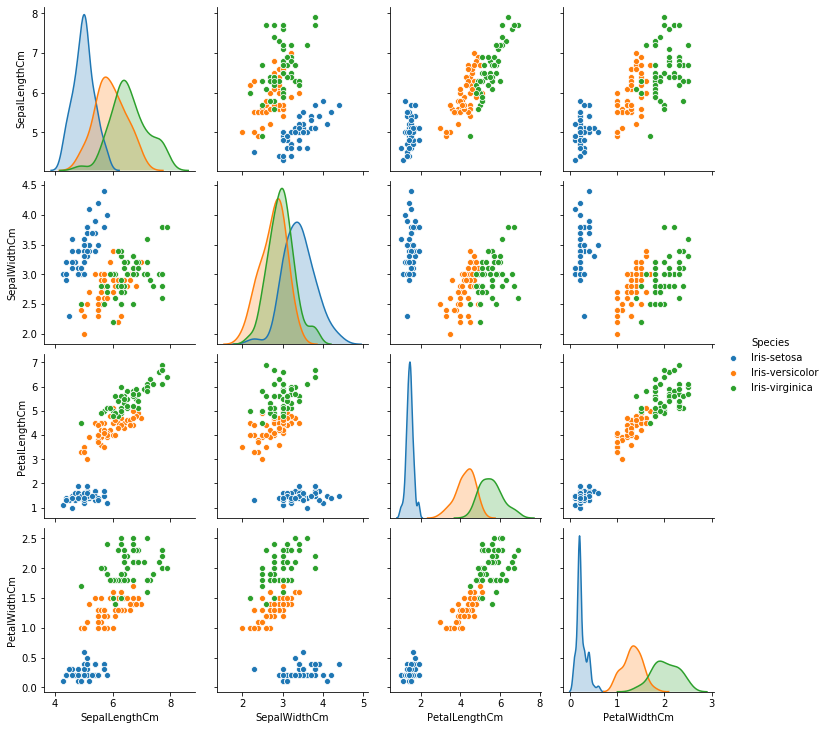

In [4]:
sns.pairplot(iris, hue = 'Species')

#### Fitting Different KMeans Clustering Models

In [5]:
kmeans_wcss = []
#wcss means Within Cluster Sum of Squares

Iris_values = iris.iloc[:, [0, 1, 2, 3]].values

for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, random_state = 0, n_jobs = -1)
    kmeans.fit(Iris_values)
    kmeans_wcss.append(kmeans.inertia_)
    #kmeans.inertia_ returns the sum of squared distances of samples to their closest center

#### Finding the optimum KMeans Cluster Model using Elbow Method

Text(0.5, 1.0, 'WCSS Values for Each Number of Clusters i.e., The Elbow Method')

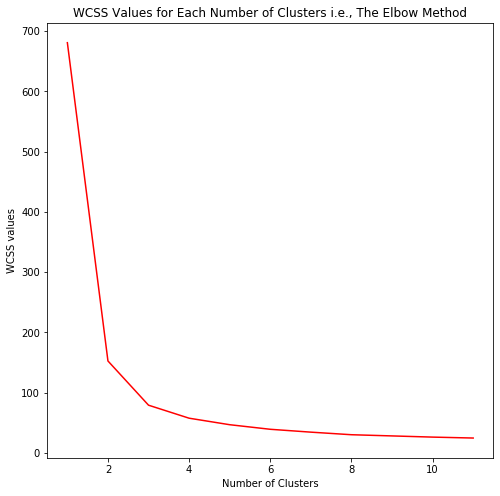

In [6]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(range(1, 12), kmeans_wcss, color = 'red')
ax.set_xlabel('Number of Clusters', fontsize = 10)
ax.set_ylabel('WCSS values')
ax.set_title('WCSS Values for Each Number of Clusters i.e., The Elbow Method')

It is evident from the above graph that after the number of clusters is more than 3 the decrease in the Within Cluster Sum of Squares is less. It is also the point at which the elbow occurs. 
So We can select the optimum number of clusters for the iris dataset to be 3.

#### Visualization of the Optimum KMeans Cluster Model

Text(0.5, 1.0, 'Petal Length vs Petal Width')

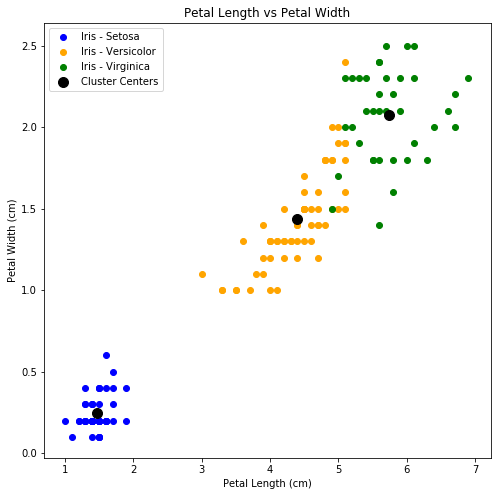

In [7]:
Final_Model = KMeans(n_clusters = 3, random_state = 0, n_jobs = -1)
Final_Model.fit_predict(Iris_values)

fig1, ax1 = plt.subplots(figsize = (8, 8))
ax1.scatter(Iris_values[Final_Model.labels_ == 1, 2], Iris_values[Final_Model.labels_ == 1, 3], color = 'blue', 
           label = 'Iris - Setosa')
ax1.scatter(Iris_values[Final_Model.labels_ == 2, 2], Iris_values[Final_Model.labels_ == 2, 3], color = 'orange', 
           label = 'Iris - Versicolor')
ax1.scatter(Iris_values[Final_Model.labels_ == 0, 2], Iris_values[Final_Model.labels_ == 0, 3], color = 'green', 
           label = 'Iris - Virginica')

ax1.scatter(Final_Model.cluster_centers_[:, 2], Final_Model.cluster_centers_[:, 3], color = 'black', 
            s = 100, label = 'Cluster Centers')
ax1.legend()
ax1.set_xlabel('Petal Length (cm)')
ax1.set_ylabel('Petal Width (cm)')
ax1.set_title('Petal Length vs Petal Width')
#Final_Model.labels_

## Thank You